<a href="https://colab.research.google.com/github/Abhiroop17/Credit-Card-Fraud-Prediction-System/blob/main/Credit_Card_Fraud_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries for Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# **Load the dataset**

In [ ]:
# Load dataset
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


# **Data Preprocessing**

In [ ]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
# Verify if missing values are filled
print("Missing values per column after imputation:\n", df.isnull().sum())

Missing values per column after imputation:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# Display summary statistics
print(df.describe())

               Time            V1            V2            V3            V4  \
count  19898.000000  19898.000000  19898.000000  19898.000000  19898.000000   
mean   15492.416374     -0.244326      0.242420      0.745774      0.277011   
std    10512.066686      1.889986      1.527342      1.767726      1.466218   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%     4536.250000     -0.959632     -0.329008      0.309235     -0.636713   
50%    14796.000000     -0.302521      0.220079      0.898672      0.224608   
75%    26220.500000      1.164473      0.870117      1.532922      1.142143   
max    30633.000000      1.960497     16.713389      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  19898.000000  19898.000000  19898.000000  19898.000000  19898.000000   
mean      -0.163264      0.092881     -0.145279      0.022237      0.636382   
std        1.430821      1.331029      1.338260    

In [ ]:
# Check data types and shape
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19898 entries, 0 to 19897
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    19898 non-null  int64  
 1   V1      19898 non-null  float64
 2   V2      19898 non-null  float64
 3   V3      19898 non-null  float64
 4   V4      19898 non-null  float64
 5   V5      19898 non-null  float64
 6   V6      19898 non-null  float64
 7   V7      19898 non-null  float64
 8   V8      19898 non-null  float64
 9   V9      19898 non-null  float64
 10  V10     19898 non-null  float64
 11  V11     19898 non-null  float64
 12  V12     19898 non-null  float64
 13  V13     19898 non-null  float64
 14  V14     19898 non-null  float64
 15  V15     19898 non-null  float64
 16  V16     19898 non-null  float64
 17  V17     19898 non-null  float64
 18  V18     19898 non-null  float64
 19  V19     19898 non-null  float64
 20  V20     19898 non-null  float64
 21  V21     19898 non-null  float64
 22

In [ ]:
# Scale 'Amount' and 'Time' columns
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

# Split data into features and target
df = df.dropna(subset=['Class'])
# Get value counts for each class
class_counts = df['Class'].value_counts()
# Filter for classes with at least 2 samples
valid_classes = class_counts[class_counts >= 2].index
# Keep only samples from valid classes
df = df[df['Class'].isin(valid_classes)]
X = df.drop('Class', axis=1)
y = df['Class']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Balance classes in the training set using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Confirm class distribution in training set
print("Class distribution after SMOTE:\n", y_train.value_counts())

Class distribution after SMOTE:
 Class
0.0    13868
1.0    13868
Name: count, dtype: int64


# **Importing Libraries for Hypertuning**

In [ ]:
pip install scikit-learn xgboost

# **Hyperparameter Tuning for XGBoost using GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:08:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='roc_auc', verbose=2)

# **Print best parameters and best score**

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best ROC AUC Score: 0.9999879270288252


# **Train XGBoost with the best parameters**

In [ ]:
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# **Evaluate the tuned model**

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [ ]:
print("\nXGBoost Evaluation Metrics with Best Parameters:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("AUC Score:", roc_auc_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Evaluation Metrics with Best Parameters:
Accuracy: 0.9986599664991624
AUC Score: 0.922740449321876
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5944
         1.0       0.85      0.85      0.85        26

    accuracy                           1.00      5970
   macro avg       0.92      0.92      0.92      5970
weighted avg       1.00      1.00      1.00      5970



# **Isolation Forest Tuning (Anomaly Detection)**

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
iso_forest = IsolationForest(
    n_estimators=100,
    max_samples=0.8,
    contamination=0.001,  # Adjust contamination based on dataset
    max_features=0.8,
    random_state=42
)
iso_forest.fit(X_train)
y_pred_if = iso_forest.predict(X_test)
y_pred_if = [1 if x == -1 else 0 for x in y_pred_if]  # Convert to 0/1

# **Evaluate Isolation Forest**

In [ ]:
print("\nIsolation Forest Evaluation Metrics with Adjusted Parameters:")
print("Accuracy:", accuracy_score(y_test, y_pred_if))
print("AUC Score:", roc_auc_score(y_test, y_pred_if))
print(classification_report(y_test, y_pred_if))


Isolation Forest Evaluation Metrics with Adjusted Parameters:
Accuracy: 0.9938023450586264
AUC Score: 0.49907469717362046
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5944
         1.0       0.00      0.00      0.00        26

    accuracy                           0.99      5970
   macro avg       0.50      0.50      0.50      5970
weighted avg       0.99      0.99      0.99      5970



In [ ]:
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]  # Get probability scores for the positive class

#**Calculate Evaluation Metrics**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming you want to evaluate the XGBoost model's predictions
y_pred = y_pred_xgb  # Assign y_pred_xgb to y_pred

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.9986599664991624
Precision: 0.8461538461538461
Recall: 0.8461538461538461
F1 Score: 0.8461538461538461
ROC-AUC Score: 0.9991264623667045


# **Confusion Matrix**

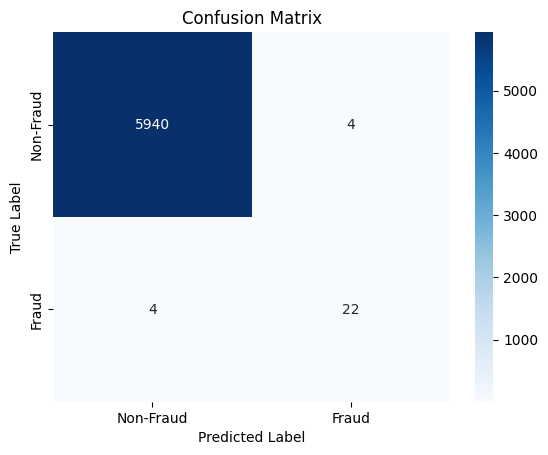

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **ROC Curve**

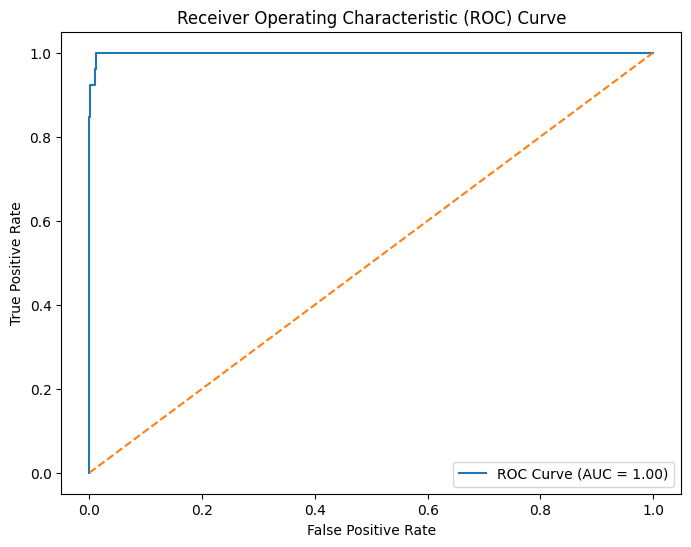

In [ ]:
from sklearn.metrics import roc_curve

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

# **Precision-Recall Curve**

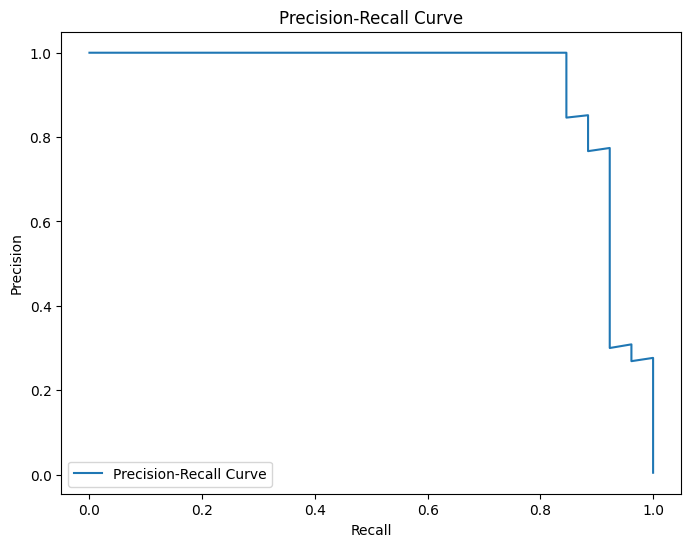

In [ ]:
from sklearn.metrics import precision_recall_curve

# Generate Precision-Recall curve values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()